In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [47]:
sns.set_palette(sns.color_palette("colorblind"))

In [48]:
data_root = '../../data/gaia/raw/'
results_root = '../../results/cluster_files/'

In [49]:
df = pd.read_hdf(os.path.join(data_root, 'common_kinematics_10kpc.h5'), key='star')

In [50]:
labels = pd.read_csv(os.path.join(results_root, 'gaia_full_snc_mom_vel.csv'))

In [60]:
def plot(df, clusters, fig_name, fig_path = '../../', sample_size = None):
    if sample_size is not None:
        sampled_ids = np.random.choice(len(clusters), sample_size, replace=False)
        df = df.iloc[sampled_ids]
        clusters = clusters[sampled_ids]
    clusters = [f'cluster {i}' for i in clusters]
    fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(15, 10))
    axs = axs.flatten()
    sns.scatterplot(data=df, x='Jphi', y='Etot', hue=clusters, style=clusters, s=10, ax=axs[0])
    sns.scatterplot(data=df, x='vr', y='vphi', hue=clusters, style=clusters, s=10, ax=axs[1])
    sns.scatterplot(data=df, x='vr', y='W', hue=clusters, style=clusters, s=10, ax=axs[2])
    J = np.sqrt(df['Jphi']**2 + df['JR']**2 + df['Jz']**2)
    sns.scatterplot(x=df['Jphi']/J, y=(df['Jz']-df['JR'])/J, hue=clusters, style=clusters, s=10, ax=axs[3])
    sns.scatterplot(data=df, x='JR', y='Jphi', hue=clusters, style=clusters, s=10, ax=axs[4])
    axs[4].set(xlim=(0, 8000))
    sns.scatterplot(data=df, x='JR', y='Jz', hue=clusters, style=clusters, s=10, ax=axs[5])
    axs[5].set(xlim=(0, 8000))
    fig.savefig(os.path.join(fig_path, fig_name))

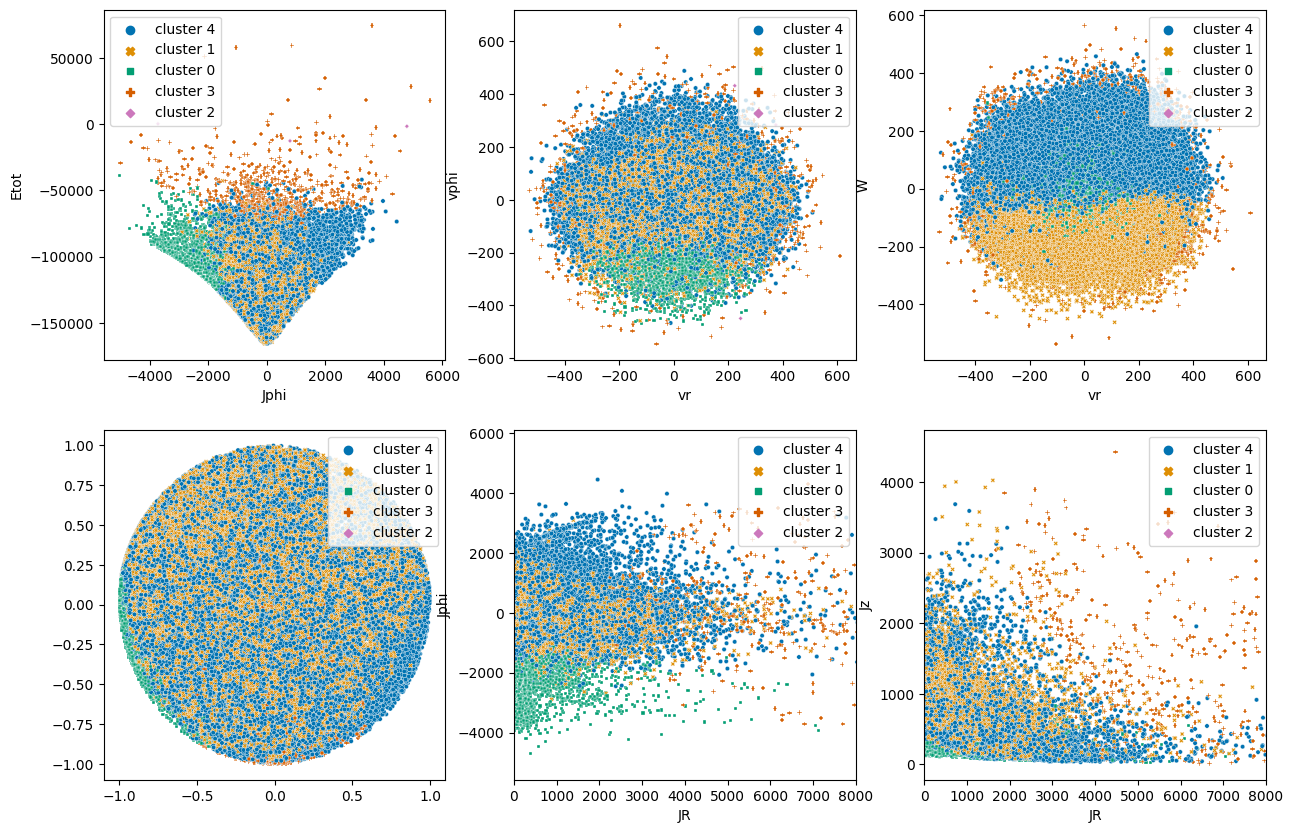

In [63]:
plot(df, labels['cluster_id'].to_numpy(), fig_name='gaia_full_snc_mom_vel_plot_all.png', sample_size=None)